In [4]:
import pickle
import os
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from scipy import spatial
import random
from collections import Counter
from math import log,sqrt
from sklearn.cluster import KMeans


In [5]:
data_path = '../../data/tfidf_pca_umap_20210915/'

In [6]:
fandom_list = [i for i in os.listdir(data_path) if 'tsv' in i]

In [7]:
fandom_list

['doctor_who_&_related_fandoms_tfidf_pca_umap_20210915.tsv',
 'dragon_age_all_media_types_tfidf_pca_umap_20210915.tsv',
 'hamilton_miranda_tfidf_pca_umap_20210915.tsv',
 'tolkien_j_r_r_works_&_related_fandoms_tfidf_pca_umap_20210915.tsv',
 'star_wars_all_media_types_tfidf_pca_umap_20210915.tsv',
 'kuroko_no_basuke_tfidf_pca_umap_20210915.tsv',
 'haikyuu_tfidf_pca_umap_20210915.tsv',
 'one_direction_tfidf_pca_umap_20210915.tsv',
 'ms_paint_adventures_tfidf_pca_umap_20210915.tsv',
 'les_miserables_all_media_types_tfidf_pca_umap_20210915.tsv',
 'shakespare_william_works_tfidf_pca_umap_20210915.tsv',
 'buffy_the_vampire_slayer_tfidf_pca_umap_20210915.tsv',
 'the_walking_dead_&_related_fandoms_tfidf_pca_umap_20210915.tsv',
 'naruto_tfidf_pca_umap_20210915.tsv',
 'arthurian_mythology_&_related_fandoms_tfidf_pca_umap_20210915.tsv',
 'bishoujo_senshi_sailor_moon_tfidf_pca_umap_20210915.tsv',
 'dcu_tfidf_pca_umap_20210915.tsv',
 'hetalia_axis_powers_tfidf_pca_umap_20210915.tsv',
 'attack_on_tit

### Simple clustering

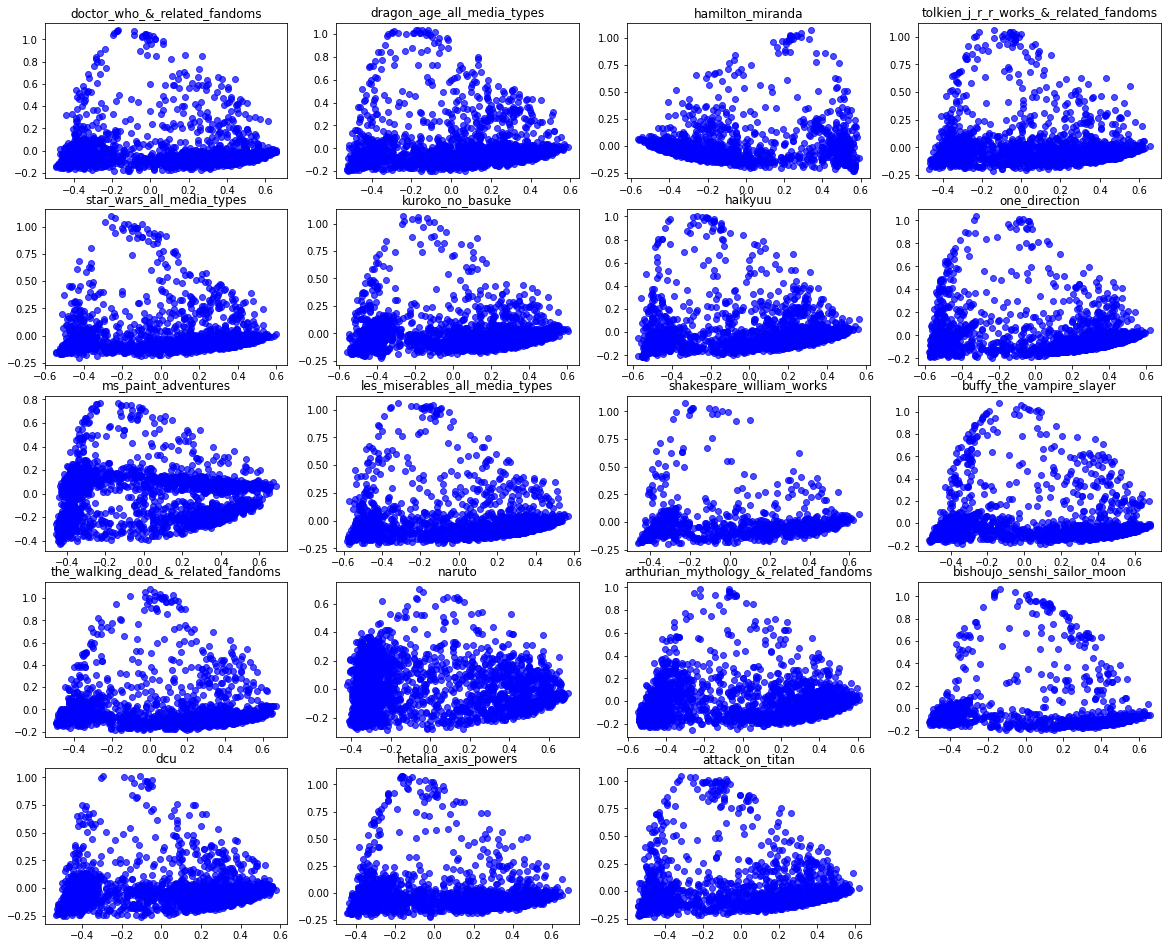

In [8]:
plt.figure(figsize = (20,20))
for i,fandom in enumerate(fandom_list):
    
    df = pd.read_csv(os.path.join(data_path,fandom), sep = '\t')
    if len(df) > 2000:
        df = df.sample(2000)
    plt.subplot(6,4,i+1)
    plt.scatter(df['pc1'], df['pc2'],alpha=0.7,c='blue')
    plt.title(fandom.replace('_tfidf_pca_umap_20210915.tsv', ''))

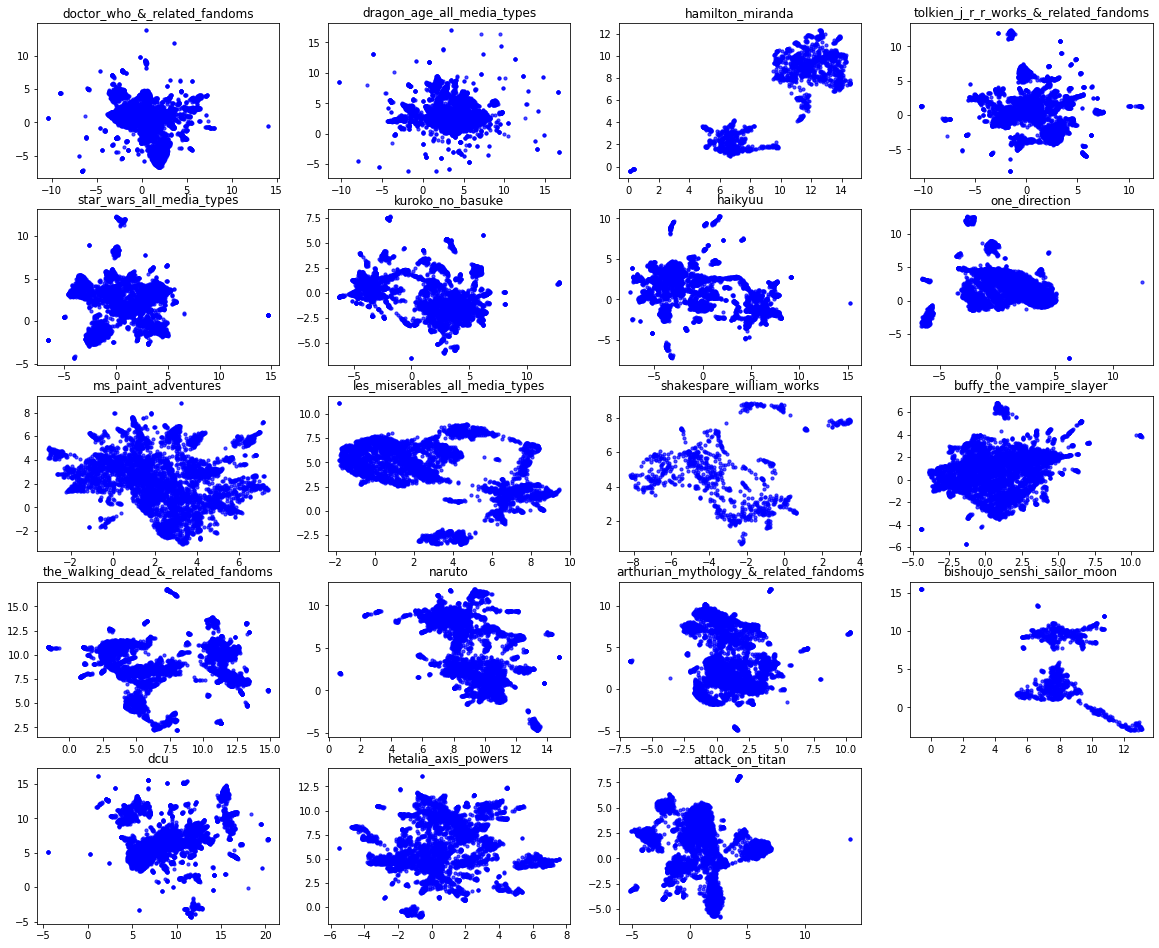

In [9]:
plt.figure(figsize = (20,20))
for i,fandom in enumerate(fandom_list):
    
    df = pd.read_csv(os.path.join(data_path,fandom), sep = '\t')
    if len(df) > 5000:
        df = df.sample(5000)
    plt.subplot(6,4,i+1)
    plt.scatter(df['umap_1'], df['umap_2'],s=10, alpha=0.7,c='blue')
    plt.title(fandom.replace('_tfidf_pca_umap_20210915.tsv', ''))

### Look at the fics

In [10]:
fandom_list = ['attack_on_titan_tfidf_pca_umap_20210915.tsv']

1 : http://archiveofourown.org/works/4041442
2 : http://archiveofourown.org/works/2367791
3 : http://archiveofourown.org/works/1181785
4 : http://archiveofourown.org/works/4517034/chapters/10293876?view_adult=true
5 : http://archiveofourown.org/works/2281383/chapters/5449967
6 : http://archiveofourown.org/works/5620900
7 : http://archiveofourown.org/works/3086516?view_adult=true
8 : http://archiveofourown.org/works/1471906
9 : http://archiveofourown.org/works/1054513
10 : http://archiveofourown.org/works/998974?view_adult=true
11 : http://archiveofourown.org/works/2127870
12 : http://archiveofourown.org/works/1370482/chapters/2974141?view_adult=true
13 : http://archiveofourown.org/works/4819652/chapters/12255533?view_adult=true
14 : http://archiveofourown.org/works/4159569/chapters/9396243
15 : http://archiveofourown.org/works/4557753/chapters/10375839
16 : http://archiveofourown.org/works/4103170?view_adult=true
17 : http://archiveofourown.org/works/1151180/chapters/2333713?view_adult

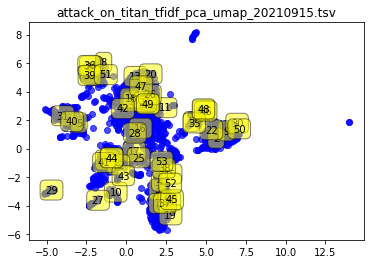

In [12]:
for i,fandom in enumerate(fandom_list):
    df = pd.read_csv(os.path.join(data_path,fandom), sep = '\t')
    if len(df) > 2000:
        df = df.sample(2000)
    plt.figure()
    plt.scatter(df['umap_1'], df['umap_2'],alpha=0.7,c='blue')
    l = 0
    for label, x, y in zip(df['URL'], df['umap_1'], df['umap_2']):
        r = random.randint(0,100)
        if r % 50 == 0:
            plt.annotate(l, xy = (x,y),bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))
            l += 1
            print(l, ":", label)
    plt.title(fandom)
    break

In [13]:
def find_close(vec, df):
    min_dist = (0,1)
    for row in df.iterrows():
        row_vec = [row[1]['umap_1'], row[1]['umap_2']]
        if vec != row_vec:
            if spatial.distance.cosine(vec,row_vec) < min_dist[1]:
                min_dist = (row[0], spatial.distance.cosine(vec,row_vec))
    return min_dist

In [14]:
df.columns.values

array(['index', 'AdditionalTags', 'ArchiveWarnings', 'Author',
       'Bookmarks', 'Category', 'Chapters', 'Characters', 'Fandoms',
       'Hits', 'Kudos', 'Language', 'Rating', 'Relationship', 'Title',
       'Words', 'PublishDate', 'UpdateDate', 'CompleteDate', 'Comments',
       'URL', 'pc1', 'pc2', 'umap_1', 'umap_2'], dtype=object)

In [15]:
# df['closest'] = df.apply(lambda row: find_close([row['umap_1'], row['umap_2']], df), axis=1 )

In [16]:
df.head(2)

index                                     AdditionalTags  \
9329   10309  Fluff, Flowers, flower shop au, punk!Annie, i ...   
11401  10099  Fluff, Angst, Teacher-Student Relationship, Ch...   

                                 ArchiveWarnings              Author  \
9329   Creator Chose Not To Use Archive Warnings  disneyprincesslevi   
11401  Creator Chose Not To Use Archive Warnings  fracturedmoonlight   

       Bookmarks Category  Chapters  \
9329           8      F/F         1   
11401         14      M/M         1   

                                              Characters  \
9329                     Mikasa Ackerman, Annie Leonhart   
11401  Eren Yeager, Levi (Shingeki no Kyojin), Petra ...   

                                        Fandoms    Hits  ...   Words  \
9329   ['Shingeki no Kyojin | Attack on Titan']   757.0  ...  1669.0   
11401  ['Shingeki no Kyojin | Attack on Titan']  1213.0  ...  2636.0   

      PublishDate UpdateDate CompleteDate Comments  \
9329   2014-09-11        NaN   2014-09-11       12   
11401  2014-12-24        NaN   2014-12-24        5   

                                            URL       pc1       pc2    umap_1  \
9329   http://archiveofourown.org/works/2287868 -0.403682  0.040461 -1.987706   
11401  http://archiveofourown.org/works/2844989 -0.143505 -0.164169 -0.104915   

         umap_2  
9329  -2.461655  
11401  3.778560  

[2 rows x 25 columns]

In [17]:
df.iloc[2].URL

'http://archiveofourown.org/works/6771022/chapters/15605611?view_adult=true'

In [18]:
df.columns.values

array(['index', 'AdditionalTags', 'ArchiveWarnings', 'Author',
       'Bookmarks', 'Category', 'Chapters', 'Characters', 'Fandoms',
       'Hits', 'Kudos', 'Language', 'Rating', 'Relationship', 'Title',
       'Words', 'PublishDate', 'UpdateDate', 'CompleteDate', 'Comments',
       'URL', 'pc1', 'pc2', 'umap_1', 'umap_2'], dtype=object)

# characters

1 : nan
2 : Levi (Shingeki no Kyojin), Petra Ral, Oluo Bozado, Eld Jinn, Gunther Schultz, Special Operations Squad | Squad Levi
3 : Jean Kirschtein
4 : Annie Leonhart, Armin Arlert, Eren Yeager
5 : Marco Bott, Jean Kirstein, Reiner Braun, Bertolt Hoover, Annie Leonhart, Sasha Blouse, Connie Springer, Eren Yeager, Mikasa Ackerman
6 : Eren Yeager, Levi (Shingeki no Kyojin), Erwin Smith, Armin Arlert, Mikasa Ackerman, Hange Zo\xc3\xab, Mike Zacharias, Reiner Braun, Bertolt Hoover, Moblit Berner, Farlan Church
7 : Eren Yeager, Levi (Shingeki no Kyojin), Armin Arlert
8 : Levi (Shingeki no Kyojin), Levi ackerman, Petra Ral, Oluo Bozado, Eld Jinn, Gunther Schultz, Erwin Smith, Hange Zo\xc3\xab, Mike Zacharias, Nanaba (Shingeki no Kyojin), Eren Yeager, Mikasa Ackerman, Jean Kirstein, Marco Bott, Armin Arlert, Ymir (Shingeki no Kyojin), Sasha Blouse, Connie Springer, Annie Leonhart, Reiner Braun, Bertolt Hoover, Krista Lenz | Historia Reiss, Nile Dok, Nifa (Shingeki no Kyojin)
9 : Levi (Shingek

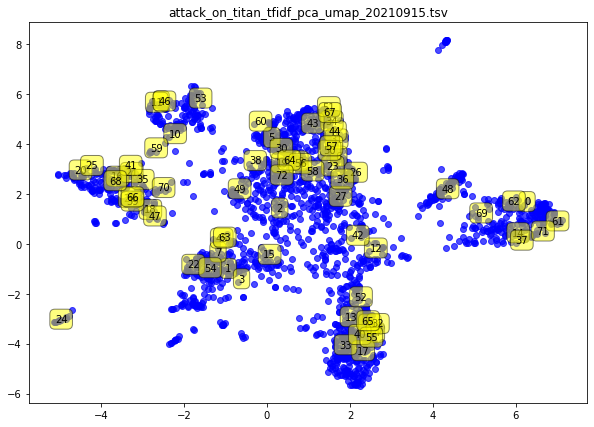

In [19]:
for i,fandom in enumerate(fandom_list):
    df = pd.read_csv(os.path.join(data_path,fandom), sep = '\t')
    if len(df) > 2000:
        df = df.sample(2000)
    plt.figure(figsize=(10,7))
    plt.scatter(df['umap_1'], df['umap_2'],alpha=0.7,c='blue')
    l = 0
    for label, x, y in zip(df['Characters'], df['umap_1'], df['umap_2']):
        r = random.randint(0,100)
        if r % 50 == 0:
            plt.annotate(l, xy = (x,y),bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))
            l += 1
            print(l, ":", label)
    plt.title(fandom)
    break

# pairing

1 : Hange Zo\xc3\xab/Levi
2 : Levi/Eren Yeager, Levi/Petra Ral, Hange Zo\xc3\xab & Erwin Smith, Others Maybe?, Levi/Eren Jeager
3 : Levi/Eren Yeager
4 : Levi/Erwin Smith, Hange Zo\xc3\xab/Mike Zacharias, Krista Lenz | Historia Reiss & Ymir, Sasha Blouse & Connie, Reiner Braun/Bertolt Hoover, Annie Leonhart/Armin Arlert, Oluo Bozado/Petra Ral, Marco Bott/Jean Kirstein
5 : Levi/Eren Yeager, Nile Dok/Erwin Smith, Marco Bott/Jean Kirstein, Mikasa Ackerman/Annie Leonhart
6 : Armin Arlert/Jean Kirstein, Jean Kirstein & Eren Yeager
7 : Hange Zo\xc3\xab/Levi, Hange Zo\xc3\xab & Levi
8 : Levi/Eren Yeager
9 : Armin Arlert/Eren Yeager
10 : Levi/Eren Yeager
11 : Levi/Eren Yeager
12 : Reiner Braun & Bertolt Hoover, Bertolt Hoover/Annie Leonhart
13 : Nanaba/Mike Zacharias
14 : Levi & Eren Yeager
15 : Marco Bott/Jean Kirstein
16 : Armin Arlert/Eren Yeager, Armin Arlert/Jean Kirstein
17 : Levi/Eren Yeager, Armin Arlert/Erwin Smith
18 : None
19 : Levi/Erwin Smith, Levi & Erwin Smith
20 : Levi/Erwin Smi

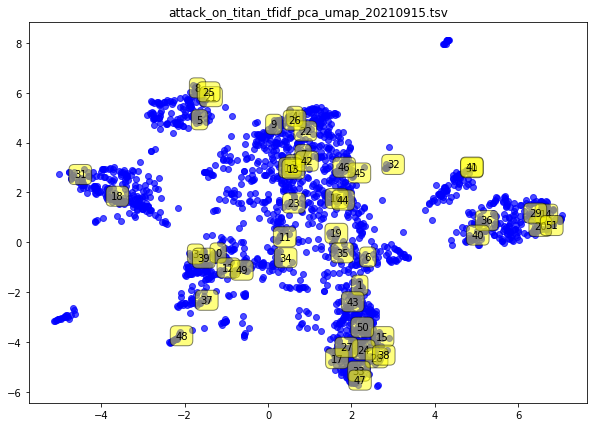

In [20]:
for i,fandom in enumerate(fandom_list):
    df = pd.read_csv(os.path.join(data_path,fandom), sep = '\t')
#     print(df.col)
    if len(df) > 2000:
        df = df.sample(2000)
    plt.figure(figsize=(10,7))
    plt.scatter(df['umap_1'], df['umap_2'],alpha=0.7,c='blue')
    l = 0
    for label, x, y in zip(df['Relationship'], df['umap_1'], df['umap_2']):
        r = random.randint(0,100)
        if r % 50 == 0:
            plt.annotate(l, xy = (x,y),bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))
            l += 1
            print(l, ":", label)
    plt.title(fandom)
    break

In [21]:
fandom_list = ['hamilton_miranda_tfidf_pca_umap_20210915.tsv']

1 : Aaron Burr, Alexander Hamilton, Thomas Jefferson
2 : Alexander Hamilton, John Laurens
3 : Alexander Hamilton, Hercules Mulligan, Gilbert du Motier Marquis de Lafayette, John Laurens, Thomas Jefferson
4 : Alexander Hamilton, John Laurens, Elizabeth "Eliza" Schuyler, Philip Hamilton, Other Character Tags to Be Added, Martha Manning, Frances Laurens
5 : Alexander Hamilton, Elizabeth "Eliza" Schuyler, Angelica Schuyler Church, Margaret "Peggy" Schuyler, HER NAME WAS MARGARITA WHAT THE HECK AO3, John Laurens, George Washington, more to be added
6 : Alexander Hamilton, Angelica Schuyler
7 : Maria Reynolds, Alexander Hamilton, James Reynolds, Aaron Burr
8 : Alexander Hamilton, John Laurens, Angelica Schuyler, Elizabeth "Eliza" Schuyler, Thomas Jefferson
9 : Alexander Hamilton, John Laurens, John Church, Elizabeth "Eliza" Schuyler, Margaret "Peggy" Schuyler, Thomas Jefferson, James Madison, Gilbert du Motier Marquis de Lafayette, Maria Reynolds, James Reynolds, Hercules Mulligan, George Wa

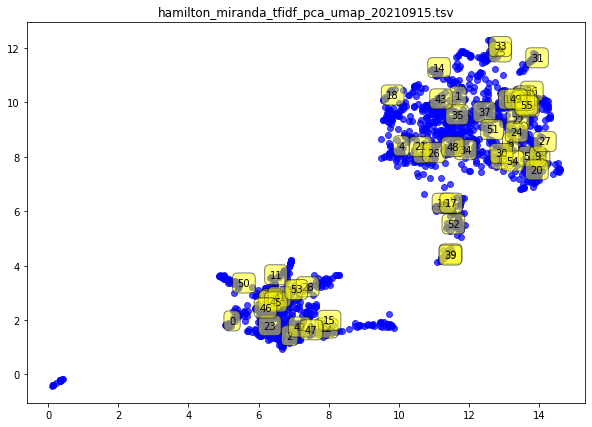

In [22]:
for i,fandom in enumerate(fandom_list):
    df = pd.read_csv(os.path.join(data_path,fandom), sep = '\t')
    if len(df) > 2000:
        df = df.sample(2000)
    plt.figure(figsize=(10,7))
    plt.scatter(df['umap_1'], df['umap_2'],alpha=0.7,c='blue')
    l = 0
    for label, x, y in zip(df['Characters'], df['umap_1'], df['umap_2']):
        r = random.randint(0,100)
        if r % 50 == 0:
            plt.annotate(l, xy = (x,y),bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))
            l += 1
            print(l, ":", label)
    plt.title(fandom)
    break

# kmeans

In [30]:
fandom = 'attack_on_titan_tfidf_pca_umap_20210915.tsv'

(2000, 2)


Text(0.5, 1.0, 'attack_on_titan_tfidf_pca_umap_20210915.tsv')

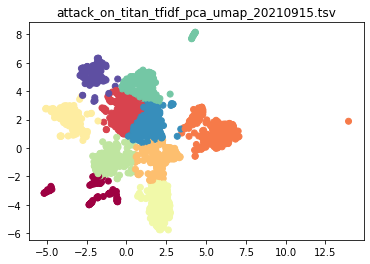

In [31]:
df = pd.read_csv(os.path.join(data_path,fandom), sep = '\t')
if len(df) > 2000:
    df = df.sample(2000)
umap_reduc = df[['umap_1', 'umap_2']].values
print(umap_reduc.shape)
kmeans = KMeans(n_clusters=10, random_state=0).fit(umap_reduc)
df['cluster'] = kmeans.labels_
plt.figure()
plt.scatter(df['umap_1'], df['umap_2'], c=df['cluster'], cmap='Spectral')

#     l = 0
#     for label, x, y in zip(df['URL'], df['umap_1'], df['umap_2']):
#         r = random.randint(0,100)
#         if r % 50 == 0:
#             plt.annotate(l, xy = (x,y),bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))
#             l += 1
#             print(l, ":", label)

plt.title(fandom)


In [36]:
df.cluster.value_counts()

5    293
2    292
7    229
6    220
1    206
4    187
8    184
3    175
9    120
0     94
Name: cluster, dtype: int64

In [86]:
def logodds(corpora_dic, bg_counter):
    """ It calculates the log odds ratio of term i's frequency between 
    a target corpus and another corpus, with the prior information from
    a background corpus. Inputs are:
    
    - a dictionary of Counter objects (corpora of our interest)
    - a Counter objects (background corpus)
    
    Output is a dictionary of dictionaries. Each dictionary contains the log 
    odds ratio of each word. 
    
    """
    corp_size = dict([(c, sum(corpora_dic[c].values())) for c in corpora_dic])
    bg_size = sum(bg_counter.values())
    result = dict([(c, {}) for c in corpora_dic])
    
    for name, c in corpora_dic.items():
        for word in c:
            #if 10 > sum(1 for corpus in corpora_dic.values() if corpus[word]):
            #    continue
            
            fi = c[word]
            fj = sum(co.get(word, 0.01) for x, co in corpora_dic.items() if x != name)
            fbg = bg_counter.get(word, 0.01)
            ni = corp_size[name]
            nj = sum(x for idx, x in corp_size.items() if idx != name)
            nbg = bg_size
            oddsratio = log(fi+fbg) - log(ni+nbg-(fi+fbg)) -\
                        log(fj+fbg) + log(nj+nbg-(fj+fbg))
            std = 1.0 / (fi+fbg) + 1.0 / (fj+fbg)
            z = oddsratio / sqrt(std)
            result[name][word] = z
            
    return result

In [108]:
def overrep(df, clu_id1, clu_id2, field):
    df = df.dropna(subset=[field])
    
    df1 = df[df['cluster']==clu_id1]
    df2 = df[df['cluster']==clu_id2]
    
    df_bg = df[df['cluster'] != clu_id1]
    df_bg = df_bg[df_bg['cluster'] != clu_id2]

    ch_list1 = []
    for line in df1[field].tolist():
        ch_list1.extend([item.strip() for item in line.split(',')])
        
    ch_list2 = []
    for line in df2[field].tolist():
        ch_list2.extend([item.strip() for item in line.split(',')])
    
    ch_list_bg = []
    for line in df_bg[field].tolist():
        ch_list_bg.extend([item.strip() for item in line.split(',')])
        
    
    corp_1 = Counter(ch_list1)
    corp_2 = Counter(ch_list2)
    corp_bg = Counter(ch_list_bg)
    

    corp_1 = {k:v for k, v in corp_1.items() if v > 1 }
    corp_2 = {k:v for k, v in corp_2.items() if v > 1 }
    corp_bg = {k:v for k, v in corp_bg.items() if v > 1 }


    result = logodds({'clu1':corp_1, 'clu2':corp_2}, corp_bg)
    print('Overrep in cluster {}: '.format(clu_id1))
    print()
    for k in sorted(result['clu1'], key=result['clu1'].get, reverse=True)[0:15]:
        print(k,result['clu1'][k])
    print()
    
    print('Overrep in cluster {}: '.format(clu_id2))
    print()
    for k in sorted(result['clu2'], key=result['clu2'].get, reverse=True)[0:15]:
        print(k,result['clu2'][k])
#     return sorted(result['fic'], key=result['fic'].get)[0:20]

In [109]:
overrep(df, 5,2, 'Characters')

Overrep in cluster 5: 

Carla Yeager 1.3466082342114436
Grisha Yeager 1.3152936551392405
Levi (Shingeki no Kyojin) 1.1952203185466372
hanji 1.1237685394192563
Oluo Bozado 1.0614240904998915
Hange Zo\xc3\xab 1.037778990138947
Petra Ral 0.9609735529618999
Krista Lenz 0.890517897316702
Ilse Langnar 0.890517897316702
Erwin Smith 0.8697155000470245
Reader 0.8046454229032096
Levi ackerman 0.7773478190785316
Eld Jinn 0.7773478190785316
Isabel Magnolia 0.7666747718751624
Berthold 0.7392249968942505

Overrep in cluster 2: 

Jean Kirstein 4.3337922409958605
Marco Bott 3.8797987073611453
Bertholdt Fubar 0.9878609687536605
Marco Bott\'s Father 0.8669827258660301
Connie Springer 0.8142931874537785
Marco Bott\'s Mother 0.7228189306438948
Jean Kirschstein 0.657396670020521
Armin 0.6436956089496028
Jean Kirstein\'s Mother 0.539958909629148
Marco Bodt 0.539958909629148
Sasha Blouse 0.4678195190235319
Sasha Braus 0.36863924811971827
Jean Kirschtein 0.36863924811971827
Hannes (Shingeki no Kyojin) 0.35545

In [110]:
overrep(df, 1,4, 'Characters')

Overrep in cluster 1: 

Eren Yeager 1.9488954403065462
Mikasa Ackerman 1.1174298560291298
Carla Yeager 1.0738837880449918
Kenny Ackerman 0.8827946313563682
Armin Arlert 0.8593675241328081
Farlan Church 0.7954434458084529
Grisha Yeager 0.795117992370857
OC - Character 0.6762050316208255
Hange Zoe (mentioned) 0.6420476935940559
The Others 0.6420476935940559
Nile Dok (mentioned) 0.6420476935940559
Kuchel Ackerman 0.5105712081689261
Sasha Blouse 0.497354774556595
Eren 0.4900615581001244
Annie Leonhart 0.48560776429872016

Overrep in cluster 4: 

Erwin Smith 3.7155224523048416
Mike Zacharias 2.532959111528243
Nile Dok 1.4695207833485582
Erwin 1.4012457658714303
Levi (Shingeki no Kyojin) 1.2664007644023207
Armin 0.906133167890461
Marie (Shingeki no Kyojin) 0.7135349367789541
Mike 0.655525362386911
Hange Zo\xc3\xab 0.6359745544489152
Dot Pixis 0.4476529367241182
Moblit Berner 0.4396226761591437
Darius Zackly 0.3508183794929495
Levi ackerman 0.3267275795222743
Nanaba (Shingeki no Kyojin) 0.319

In [115]:
overrep(df, 8,3, 'Characters')

Overrep in cluster 8: 

Eren Yeager 1.3562517611454812
Levi (Shingeki no Kyojin) 1.301132058574298
Farlan Church 1.101920389333105
Darius Zackly 0.7751518961020422
Survey Corps (Shingeki no Kyojin) 0.73038177174227
Christa 0.7017038533810038
Hitch Dreyse 0.6774221185897972
Dot Pixis 0.6670886022613516
You 0.64937716188127
Kalura Yeager 0.64937716188127
Levi 0.5959720848542616
Eren Jeager 0.5791142837188921
Rico Brzenska 0.5486823875213893
Original Character 0.45397680199952767
Reader 0.4436353873760801

Overrep in cluster 3: 

Sasha Blouse 0.9849986864856414
Connie Springer 0.8357508150204156
Annie Leonhart\'s Father 0.7913475040167918
Nanase Haruka 0.7913475040167918
Hyakuya Mikaela 0.706193861226769
Bertholdt Hoover 0.6902001113980017
Marco Bott\'s Father 0.6902001113980017
Jean Kirschtein 0.6745968428655176
Reiner Braun 0.6599093256128549
Jean Kirstein\'s Mother 0.6523566191500891
Hannah (Shingeki no Kyojin) 0.6481965561044832
Hyakuya Yuuichirou 0.6481965561044832
Nickolas Colton 0.

In [112]:
overrep(df, 5,2, 'Relationship')

Overrep in cluster 5: 

Levi/Eren Yeager 4.265603241859041
Levi/Eren Jaeger 1.4444851622852282
Levi & Eren Yeager 1.313527172340103
Hange Zo\xc3\xab/Erwin Smith 1.2084037838824613
Armin Arlert & Erwin Smith 0.9744811424283787
Levi (Shingeki no Kyojin)/Reader 0.9572368715350341
Bertolt Hoover/Annie Leonhart 0.9299192893388313
Mikasa Ackerman/Armin Arlert 0.8871314073985653
Armin Arlert/Erwin Smith 0.8792661858769212
Krista Lenz | Historia Reiss/Ymir 0.8418867188337362
Ereri - Relationship 0.8077142880766653
Armin Arlert/Reader 0.7937431653651305
Levi/OC 0.7937431653651305
Mikasa Ackerman/Annie Leonhart 0.7641177922928274
Oluo Bozado/Petra Ral 0.7483254470627275

Overrep in cluster 2: 

Jean Kirstein/Eren Yeager 5.055246427030301
Marco Bott/Jean Kirstein 4.382186388667747
Marco Bott & Jean Kirstein 2.746843701306285
Jean Kirstein & Eren Yeager 1.677472473150857
Jean Kirstein/Reader 1.2710167483997858
Marco Bott/Eren Yeager 1.2305010862196384
Jean Kirstein/Marco Bott 1.137866208069158
Jea

In [113]:
overrep(df, 1,4, 'Relationship')

Overrep in cluster 1: 

Levi/Eren Yeager 3.300297712051937
Levi/Erwin Smith/Eren Yeager 1.9106990046794399
Erwin Smith/Eren Yeager 1.8070137860475592
Levi/Reader 1.4024452418306317
levi x reader 0.9627277853058861
Mikasa Ackerman & Armin Arlert & Eren Yeager 0.865100087800877
Carla Yeager/Grisha Yeager 0.7053542856901645
eren/levi 0.6473269214222572
Levi (Shingeki no Kyojin)/Original Character(s) 0.6089875549171032
Eren Yeager/Reader 0.5981379471559305
Hange Zo\xc3\xab/Erwin Smith 0.5719940687412508
Ereri - Relationship 0.5719940687412508
Levi/Petra Ral 0.5618821196842182
Mikasa Ackerman/Jean Kirstein 0.5552438528571599
Levi & Eren Yeager 0.47249199777631673

Overrep in cluster 4: 

Levi/Erwin Smith 7.586663121569716
Levi & Erwin Smith 2.4916090706696625
Erwin Smith/Mike Zacharias 2.1509777866125033
Erwin Smith/Reader 0.912681905792597
Moblit Berner/Hange Zo\xc3\xab 0.9084832941159353
Nanaba/Mike Zacharias 0.876188321189309
eruri 0.8651382114143955
Levi/Mike Zacharias 0.749503447280617

In [114]:
overrep(df, 7,6, 'Relationship')

Overrep in cluster 7: 

Levi/Eren Yeager 6.601041049145354
Levi & Eren Yeager 1.7823280108932507
Levi/Eren 0.7975389946645238
Erwin/Levi 0.6975390263129274
Bertolt Hoover/Annie Leonhart 0.6866380817593105
Levi (Shingeki no Kyojin)/Original Titan Character(s) 0.6489495984613438
Reiner Braun/Krista Lenz | Historia Reiss 0.6489495984613438
Eren x Levi 0.6489495984613438
Reiner Braun/Bertolt Hoover 0.6365774564104287
Reiner Braun & Bertolt Hoover & Annie Leonhart 0.6268889130142605
Reiner Braun/Bertolt Hoover/Annie Leonhart 0.5739221302185625
Erwin Smith/Mike Zacharias 0.5409113163409116
Minor or Background Relationship(s) 0.44721444201176275
Armin Arlert/Erwin Smith 0.44175513148828943
Eren Yeager/Reader 0.40904301464641657

Overrep in cluster 6: 

Hange Zo\xc3\xab/Levi 4.15350765442165
Mikasa Ackerman/Levi 3.3799290714700847
Hange Zo\xc3\xab & Levi 2.9273543017403183
Levi/Petra Ral 2.1237069227755665
Mikasa Ackerman/Eren Yeager 1.8899683507925251
Oluo Bozado/Petra Ral 1.6033471867188553
